# Working with Categorical Data

## Introduction to Categorical Data

In [2]:
import pandas as pd
import seaborn as sns

#~ Ordinal - With natural order
#~ Nominal - no natural order
athletes = pd.read_csv('/home/toni/Desktop/Programming_Projects/Data Science Projects/Datasets/Tokyo_2021_dataset.csv')
display(athletes.head())
display(athletes['Continent'].value_counts(normalize=True))
display(athletes.groupby('Continent')['Gold Medal'].sum())

#~ Creating categorical series
my_category = pd.Categorical(athletes['Continent'],categories=['C','B','A'],ordered=False)
display(my_category)
#* Saves memory - Categorical data can be memory efficient vs strings 

#~ Instead of value_counts, we use size()
at=athletes.groupby(['Continent']).size()
display(at)

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


Continent
Europe           0.408602
Asia             0.236559
Africa           0.150538
North America    0.107527
South America    0.053763
Australia        0.032258
Europe/Asia      0.010753
Name: proportion, dtype: float64

Continent
Africa            11
Asia              88
Australia         25
Europe           125
Europe/Asia       20
North America     61
South America     10
Name: Gold Medal, dtype: int64

[NaN, NaN, NaN, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 93
Categories (3, object): ['C', 'B', 'A']

Continent
Africa           14
Asia             22
Australia         3
Europe           38
Europe/Asia       1
North America    10
South America     5
dtype: int64

## Categorical pandas Series

In [24]:
sleep= pd.read_csv('/home/toni/Desktop/Programming_Projects/Data Science Projects/Datasets/Sleep_health_and_lifestyle_dataset.csv')
display(sleep.head())
sleep['BMI Category'] = sleep['BMI Category'].astype("category")
display(sleep['BMI Category'].value_counts())

#~ Set categories
sleep = sleep.replace(to_replace='Normal Weight',value='Normal')
display(sleep['BMI Category'].value_counts())
#~ add categories
sleep['BMI Category'] = sleep['BMI Category'].cat.add_categories(new_categories=['Underweight'])
sleep['BMI Category'] = sleep['BMI Category'].cat.set_categories(new_categories=['Underweight','Normal','Overweight','Obese'],ordered=True)
display(sleep['BMI Category'].cat.categories)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

/tmp/ipykernel_6683/1737872316.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sleep = sleep.replace(to_replace='Normal Weight',value='Normal')


BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

Index(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype='object')

## Visualizing Categorical Data

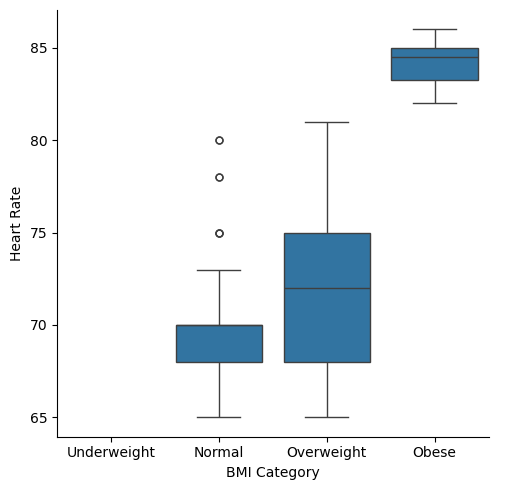

In [9]:

#~ catplot() - Categorical plots: boxplot,
sns.catplot(x='BMI Category',y='Heart Rate',data=sleep,kind='box')

## Pitfalls and Encoding

In [25]:

#~ The number of bytes needed for a categorical column is proportional to the number of categories 
#~ (More categories = More bytes)
#* Solution: Always convert to categorical and make sure no missing values occured

#~ Using codes for label cencoding
sleep['bmi_code']=sleep['BMI Category'].cat.codes 
display(sleep['BMI Category'].value_counts())
display(sleep['bmi_code'].value_counts())

codes = sleep['BMI Category'].cat.codes
categories= sleep['BMI Category']
name_map = dict(zip(codes,categories))
print(name_map)

#* use the map() to map the values back
sleep['BMI Category'] = sleep['BMI Category'].map(codes)


BMI Category
Normal         216
Overweight     148
Obese           10
Underweight      0
Name: count, dtype: int64

bmi_code
1    216
2    148
3     10
Name: count, dtype: int64

{2: 'Overweight', 1: 'Normal', 3: 'Obese'}


In [28]:

#~ One-hot encoding - Creating dummy variables. Use pd.get_dummies()
sleep_1 = pd.read_csv('/home/toni/Desktop/Programming_Projects/Data Science Projects/Datasets/Sleep_health_and_lifestyle_dataset.csv')
sleep_one_hot = pd.get_dummies(sleep_1[['BMI Category','Gender']])
display(sleep_one_hot.head())

,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Gender_Female,Gender_Male
0,False,False,False,True,False,True
1,True,False,False,False,False,True
2,True,False,False,False,False,True
3,False,False,True,False,False,True
4,False,False,True,False,False,True
